회귀분류


## 몸무게 예측

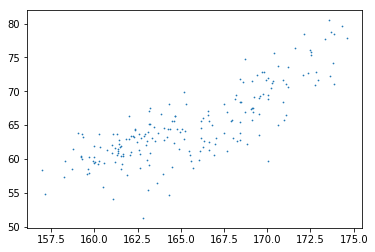

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

n_samples = 100
x1 = 3*np.random.randn(n_samples) + 169
x2 = 2*np.random.randn(n_samples) + 162

y1 = 2*x1 - 270 + 3*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + 2*np.random.randn(n_samples) # 평균 60kg

x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
plt.scatter(x,y, s=0.5)

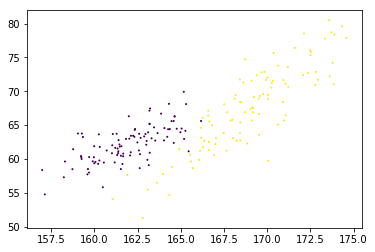

In [55]:
X = pd.DataFrame({'height':x})
y = pd.DataFrame({'weight':y})
Z = pd.concat([X, y],  axis=1)

Z['sex'] = n_samples*[1] + n_samples*[0]

X = Z[['height', 'weight']]
y = Z['sex']
plt.scatter(X['height'], X['weight'], c=y, s=1)

In [56]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = SGDClassifier(max_iter=1000)  # 선형분류
dtc = DecisionTreeClassifier()      # 결정트리
rfc = RandomForestClassifier(n_estimators=200)  # 랜덤포레스트

In [57]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6166666666666667

In [58]:
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.95

In [59]:
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9666666666666667

In [60]:
# a = clf.coef_[0][0]
# b = clf.coef_[0][1]
# c = clf.intercept_

# # xx = np.linspace(150, 180, 10)
# # yy = - (a/b)*xx + c/b
# # plt.plot(xx,yy)
# plt.scatter(x, y, s=1, c=y)

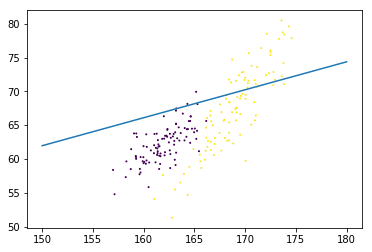

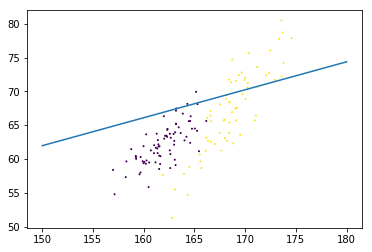

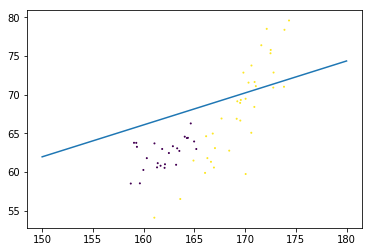

In [70]:
a = clf.coef_[0][0]
b = clf.coef_[0][1]
c = clf.intercept_

xx = np.linspace(150, 180, 10)
yy = - (a/b)*xx + c/b
plt.plot(xx,yy)
plt.scatter(X['height'], X['weight'], s=1, c=y)
plt.show()

plt.plot(xx,yy)
plt.scatter(X_train['height'], X_train['weight'], s=1, c=y_train)
plt.show()

plt.plot(xx,yy)
plt.scatter(X_test['height'], X_test['weight'], s=1, c=y_test)
plt.show()

In [71]:
a, b, c

(-828.9391328157963, 2004.0163914757518, array([-172.64976254]))

# 스케일링

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [73]:
x_sc = StandardScaler().fit_transform(X)

# x_min = MinMaxScaler().fit_transform(X)

In [74]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.3)

clf = SGDClassifier(max_iter=1000)  # 선형분류
dtc = DecisionTreeClassifier()      # 결정트리
rfc = RandomForestClassifier(n_estimators=200)  # 랜덤포레스트

In [75]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9833333333333333

In [76]:
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.95

In [77]:
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9666666666666667

# 결정경계

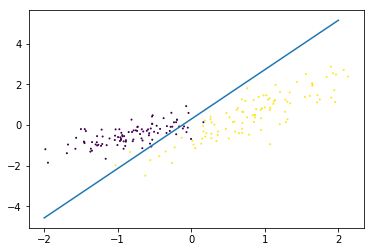

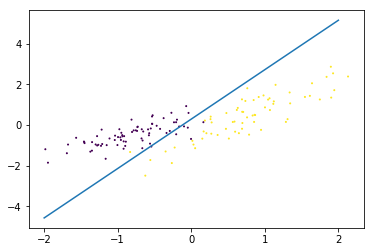

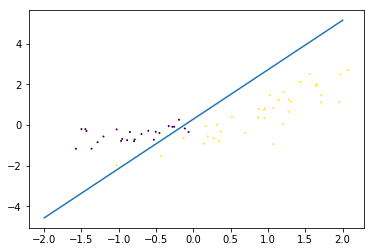

In [78]:
a = clf.coef_[0][0]
b = clf.coef_[0][1]
c = clf.intercept_

xx = np.linspace(-2, 2, 10)
yy = - (a/b)*xx + c/b
plt.plot(xx,yy)
plt.scatter(x_sc[:, 0], x_sc[:, 1], s=1, c=y)
plt.show()

plt.plot(xx,yy)
plt.scatter(X_train[:, 0], X_train[:, 1], s=1, c=y_train)
plt.show()

plt.plot(xx,yy)
plt.scatter(X_test[:, 0], X_test[:, 1], s=1, c=y_test)
plt.show()

In [89]:
clf.score(X_test, y_test)

0.9833333333333333

In [82]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_sc, y, cv=10)

array([1.  , 0.9 , 1.  , 1.  , 1.  , 0.95, 0.95, 1.  , 0.95, 1.  ])

In [85]:
cross_val_score(clf, x_sc, y, cv=10).mean()

0.9550000000000001

In [86]:
rfc.score(X_test, y_test)

0.9666666666666667

In [87]:
cross_val_score(rfc, x_sc, y, cv=10).mean()

0.9649999999999999

TypeError: 'list' object is not callable

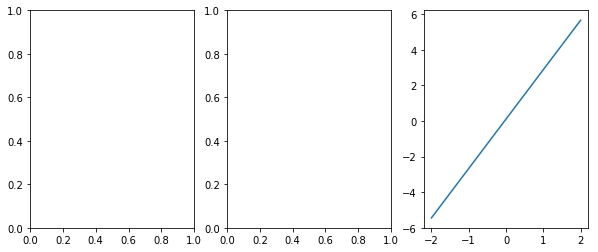

In [32]:
# figure, (ax1, ax2, ax3) = plt.subplots(1, 3)
# figure.set_size_inches(10, 4)
# plt.plot(xx,yy)(ax=ax1)
# # plt.scatter(x_sc[:, 0], x_sc[:, 1], s=1, c=y, ax=ax1)

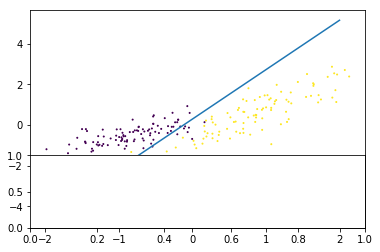

In [91]:
fig = plt.figure()
# fig = figure.set_size_inches(10, 4)
plt.subplots_adjust(hspace = 1, wspace = 0.3)
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(xx,yy)
ax1.scatter(x_sc[:, 0], x_sc[:, 1], s=1, c=y)

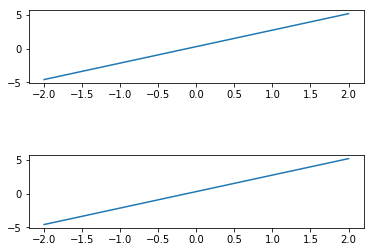

In [99]:
# plt.figure(num=1,dpi=100,facecolor='white')

plt.subplots_adjust(hspace = 1, wspace = 0.3)

# first suplot .......
plt.subplot(2,1,1)

# plt.title('Desired vs. Measured')
# plt.xlabel('time')
# plt.ylabel('value')
# plt.xlim( 0, 5)
# plt.ylim( -1.2*A, 1.2*A)

plt.plot(xx,yy)

# plt.grid()

# second suplot .......
plt.subplot(2,1,2)

# plt.xlabel('time')
# plt.ylabel('value')
# plt.xlim( 0, 5)
# plt.ylim( -1.2*A, 1.2*A)

plt.plot(xx,yy)

plt.show()

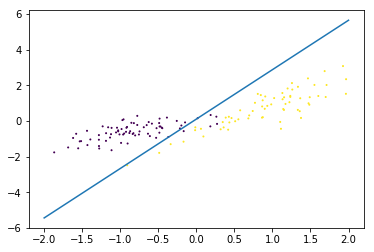

In [38]:
plt.plot(xx,yy)
plt.scatter(X_train[:, 0], X_train[:, 1], s=1, c=y_train)

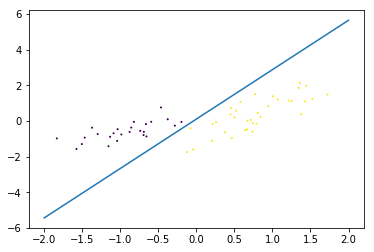

In [40]:
plt.plot(xx,yy)
plt.scatter(X_test[:, 0], X_test[:, 1], s=1, c=y_test)

In [20]:
clf.predict([[1, 1], [-2, -1]])

array([1, 0], dtype=int64)

In [23]:
rfc.predict_proba([[1., 1.], [-2, -1], [0.1, -0.3]])

array([[0.   , 1.   ],
       [1.   , 0.   ],
       [0.045, 0.955]])

## 교차검증

In [11]:
from sklearn.cross_validation import cross_val_score, KFold

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X.shape[1]

2

In [13]:
cross_val = KFold(X.shape[0], 10, shuffle=True)
print(cross_val_score(leg, X, y, cv=cross_val))

[0.91730411 0.92643381 0.88982475 0.92241677 0.92051448 0.92369165
 0.92280979 0.92172595 0.91799853 0.9232087 ]


## 결정트리를 이용한 회귀 (뒤에서 설명함)

In [15]:
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print(dec_reg.score(X_test, y_test))

0.8837243668233168
